[chess boards](https://reader.elsevier.com/reader/sd/pii/S0012365X07010394?token=4DD81599315BC7BF6F945BD96C06CF56A15816BD8C3C912761E944093CB24841C8FF17A14D5B94ABE801C47F3586C79E&originRegion=eu-west-1&originCreation=20211018125055)

# Mastermind

The game is played using:

- a decoding board, with a shield at one end covering a row of four large holes, and twelve (or ten, or eight, or six) additional rows containing four large holes next to a set of four small holes;
- code pegs of six different colors (or more; see Variations below), with round heads, which will be placed in the large holes on the board; and
- key pegs, some colored black, some white, which are flat-headed and smaller than the code pegs; they will be placed in the small holes on the board.

## Knuth

[stack discussion ](https://stackoverflow.com/questions/53826287/donald-knuth-algorithm-for-mastermind-can-we-do-better)

- His original algorithm gave 5801 (average of 5801/1296 ≈ 4.47608), and the minor improvement gives 5800 (≈ 4.4753).

- Robert W. Irving, “Towards an optimum Mastermind strategy,” Journal of Recreational Mathematics 11 (1978), 81-87 [while staying within the “at most 5” achieves 5664 ⇒ ≈4.37]

- E. Neuwirth, “Some strategies for Mastermind,” Zeitschrift fur Operations Research 26 (1982), B257-B278 [achieves 5658 ⇒ ≈4.3657]

-Kenji Koyama and Tony W. Lai, “An optimal Mastermind strategy,” Journal of Recreational Mathematics 25 (1993), 251-256 [achieves 5626 ⇒ ≈4.34104938]



[paper](https://www.cs.uni.edu/~wallingf/teaching/cs3530/resources/knuth-mastermind.pdf)

https://www.dcode.fr/mastermind-solver

In [12]:
import numpy as np
import random

In [9]:
np.random.randint(0,high=6,size=4)

array([1, 1, 5, 4])

In [8]:
tt = np.array([0,0,1,1])

In [77]:
code = random.sample(list(range(4)),4)
guess = [0,0,1,1]

In [7]:
def f(x, N=4):  
    L = []
    for k in range(N):
        L.append(x % 6)
        x = x // 6
    return L

In [16]:
f(6**4-1)

[5, 5, 5, 5]

## Evaluate the guess - feedback function

The codebreaker tries to guess the pattern, in both order and color, within eight to twelve turns. 
Each guess is made by placing a row of code pegs on the decoding board. 

Once placed, the codemaker provides **feedback** by placing from zero to four key pegs in the small holes of the row with the guess. 

- A colored or black key peg is placed for each code peg from the guess which is correct in both color and position. 
- A white key peg indicates the existence of a correct color code peg placed in the wrong position.


In [183]:
def score(code, guess):
    # 4 is hardcoded should use len(code)
    rest = [(x,y) for x,y in zip(code, guess) if x != y ]
    if len(rest) == 0: return 4,0
    X,Y = list(zip(* rest))
    coloured = 4 - len(X)
    white = len(set(X).intersection(set(Y)))
    return coloured, white

In [80]:
my_score = score(code, guess)
my_score

(2, 0)

In [3]:
from itertools import permutations, combinations, chain
 
# Get all permutations of pegs
guesses  = permutations(list(range(4)))

## Baby version of game

- only 4 colors

---

## Initialize game

- choose code
- make first guess
- list of all possible guesses

In [192]:
code = random.sample(list(range(4)),4)
guess = [0,0,1,1]
guesses  = permutations([0,1, 2, 3])

In [194]:
my_score = score(code, guess)
guesses = [ x  for x in guesses if score(x, guess) == my_score]
guess = random.choice(guesses)
guesses


[(2, 3, 1, 0), (3, 2, 0, 1)]

# Classic Mastermind 

This is a game without repeats in the code.

## Initialize game

- choose code
- make first guess
- list of all possible guesses

Listing all the guesses is a bit more complicated

In [32]:
pegs = list(range(6))

code = random.sample(pegs,4)
guess = [0,0,1,1]

guesses = [list(permutations(x)) for x in combinations(pegs, 4)]
guesses = list(chain(*guesses))

NameError: name 'combinations' is not defined

In [224]:
my_score = score(code, guess)
guesses = [ x  for x in guesses if score(x, guess) == my_score]
guess = random.choice(guesses)
len(guesses)

1

In [13]:
from copy import deepcopy

pegs = list(range(6))



## couldn't get the jit to work 

In [2]:
from numba import jit

@jit
def score(code, guess):
    # 4 is hardcoded should use len(code)
    rest = [(x,y) for x,y in zip(code, guess) if x != y ]
    if len(rest) == 0: return 4,0
    X = [x[0] for x in rest]
    Y = [x[1] for x in rest]
    coloured = 4 - len(X)
    white = len(set(X).intersection(set(Y)))
    return coloured, white

## So here is the whole thing

In [202]:
import random 

pegs = list(range(6))

def f(x, N=4):  
    L = []
    for k in range(N):
        L.append(x % 6)
        x = x // 6
    return L

def score(code, guess):
    # 4 is hardcoded should use len(code)
    rest = [(x,y) for x,y in zip(code, guess) if x != y ]
    if len(rest) == 0: 
        return 4,0
    X,Y = list(zip(* rest))
    coloured = 4 - len(X)
    white = len(set(X).intersection(set(Y)))
    # so in the usual version we give back a vector (coloured, white)
    # what if we just give the norm of the vector?
    # which is the best norm to know ?
    return 2*coloured + white
    return max(coloured, white)
    

combs = [f(x) for x in range(0,6**4)]

def do_all():
    data = []

    for x in combs[:]:
        guess = [0,0,1,1]
        guesses = [ t for t in combs]
        for k in range(1,1000):
            my_score = score(x, guess)
            # I don't know if this speeds things up by using _
            guesses = [ _  for _ in guesses if score(_, guess) == my_score]
            guess = random.choice(guesses)
            if len(guesses) < 2: 
                data.append((x,k))
                break
    return data

In [203]:

data = do_all()

# Conclusion

there are only 24x15 possibilities so the game is very easy to solve

- on average it takes less than 4 guesses
- maybe I have misunderstood the rules :(


In [204]:
dd, gg = zip(*data )
sum(gg)/len(gg)

4.780092592592593

In [152]:
data.sort(key= lambda x: x[1])

In [153]:
data[-10:]

[([5, 2, 0, 0], 13),
 ([5, 4, 4, 1], 13),
 ([0, 2, 5, 2], 13),
 ([3, 0, 1, 3], 13),
 ([1, 1, 4, 3], 13),
 ([4, 2, 0, 4], 13),
 ([0, 5, 1, 4], 13),
 ([5, 4, 0, 5], 13),
 ([5, 1, 3, 5], 13),
 ([2, 4, 1, 4], 16)]

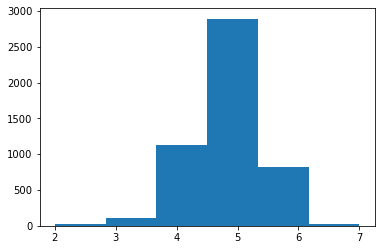

In [205]:
import matplotlib.pyplot as plt

x = data[-20][0]

mm = []            

for tt in range(5000):
    guess = [0,0,1,1]
    guesses = [ t for t in combs]
    for k in range(1,100):
        my_score = score(x, guess)
        guesses = [ t  for t in guesses if score(t, guess) == my_score]
        guess = random.choice(guesses)
        #print(guess)
        if len(guesses) < 2: 
            mm.append(k)
            break
plt.hist(mm,bins=max(mm)-1);

In [164]:
import matplotlib.pyplot as plt

In [199]:
sum(gg)

9405

In [201]:
data[-4:]

[([0, 5, 1, 4], 13),
 ([5, 4, 0, 5], 13),
 ([5, 1, 3, 5], 13),
 ([2, 4, 1, 4], 16)]

In [261]:
L

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)]

In [206]:
import numpy as np

In [241]:
mm =[5,1,-4,4,1,-3,0,2,-1]

In [242]:
mm=  np.array(mm).reshape(3,3)

In [248]:
np.linalg.solve(mm, np.ones(3))

array([0.33333333, 0.66666667, 0.33333333])

In [250]:
mm.dot(np.array([.333,.666,.333]))

array([0.999, 0.999, 0.999])

In [217]:
mm.dot(np.array([1,2,1]))

array([3, 3, 3])

In [222]:
np.linalg.inv(mm)

array([[-1.66666667,  2.33333333, -0.33333333],
       [-1.33333333,  1.66666667,  0.33333333],
       [-2.66666667,  3.33333333, -0.33333333]])

In [246]:
mm


array([[ 5,  1, -4],
       [ 4,  1, -3],
       [ 0,  2, -1]])

In [247]:
mm[:,0] + mm[:,2]

array([ 1,  1, -1])

array([[ 5,  4,  0],
       [ 1,  1,  2],
       [-4, -3, -1]])